# Point 3

- Each job has multiple variables from category, salary, type of job, etc. Define a ranking of what matters most to candidates based on their behavior shown so far.

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

##### Load dataset

This dataset was created using <b> applications_per_job.sql </b> query, that concatenates jobs and counts how many applications each one received. 

In [2]:
#Load original data
df = pd.read_csv('../data/job_data.csv', sep=',',dtype={'duration': 'S10','required_work_experience': 'S10','job_type': 'S10',
                                                       'salary_period': 'S10','position_name': 'S10'})

In [3]:
#Fill NA in salary with -1 
df['salary'].fillna(-1, inplace=True)

In [4]:
df.head()

,id_job,duration,required_work_experience,job_type,salary_period,salary,position_name,latitude,longitude,applied
0,02c47a39339ag80dfg4a82g2328g68d7d51c,b'TEMPORAL',b'No',b'PART_TIME',b'HOUR',13.0,b'Cashier',40.751213,-73.903648,153
1,edf95c24ebc2gb0bcg4c08gb487g1efd8a76,b'PERMANENT',b'No',b'PART_TIME',b'HOUR',14.0,b'Front desk',40.712776,-74.005974,133
2,3a326702a5f0gbee9g48a4gd5ddgb95cd3ac,b'TEMPORAL',b'No',b'PART_TIME',b'',-1.0,b'General La',40.705074,-74.009163,121
3,ade2625b02d1ga1f5g48e3g7dc3gc75cd53f,b'',b'No',b'NONE',b'',-1.0,b'Home healt',40.613579,-73.962761,115
4,fa5f9a98a642gb407g41a9gc46dg5f6ecc73,b'PERMANENT',b'No',b'FULL_TIME',b'',-1.0,b'Stockperso',40.700741,-73.941330,107


## Descriptive Analysis

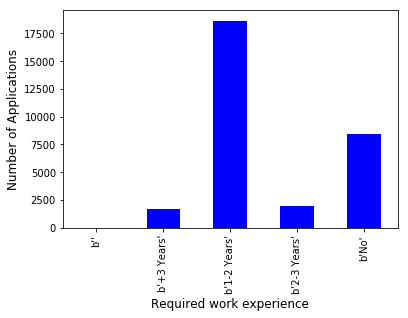

In [5]:
ax = df.groupby(['required_work_experience']).sum()['applied'].plot(kind='bar', color = "blue")
ax.set_xlabel("Required work experience", fontsize=12)
ax.set_ylabel("Number of Applications", fontsize=12)
plt.show()

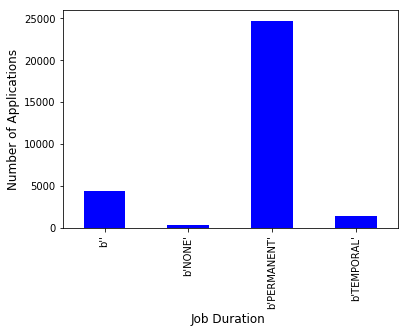

In [6]:
ax = df.groupby(['duration']).sum()['applied'].plot(kind='bar', color = "blue")
ax.set_xlabel("Job Duration ", fontsize=12)
ax.set_ylabel("Number of Applications", fontsize=12)
plt.show()

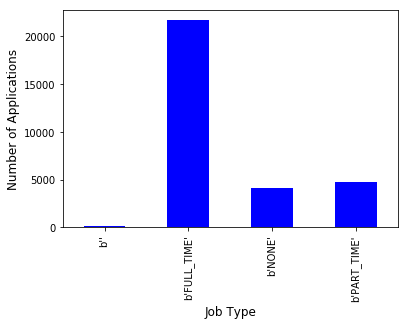

In [7]:
ax = df.groupby(['job_type']).sum()['applied'].plot(kind='bar', color = "blue")
ax.set_xlabel("Job Type", fontsize=12)
ax.set_ylabel("Number of Applications", fontsize=12)
plt.show()

## Predictive Analysis

Also a predictive Analysis was performed, Training a Random Forest Regressor and using their methods to rank features to contrast what graphs told about applications. 


In [8]:
#Feature to use:
COL = ['duration','required_work_experience','job_type','salary_period','salary','applied']
#Select features 
df = df[COL]

In [9]:
#Create X[feature] Y[Target] dataframes
X = df[COL[:len(COL)-1]]
Y = df[COL[len(COL)-1]]

In [10]:
#List unique values in the df['name'] column
print(df.duration.unique())
print(df.required_work_experience.unique())
print(df.job_type.unique())
print(df.salary_period.unique())

[b'TEMPORAL' b'PERMANENT' b'' b'NONE']
[b'No' b'1-2 Years' b'2-3 Years' b'+3 Years' b'']
[b'PART_TIME' b'NONE' b'FULL_TIME' b'']
[b'HOUR' b'' b'MONTH']


In [11]:
#Creating training and Test set [Hold out validation]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
##############
#  Encoding  #
##############
    
encoder_duration = LabelEncoder()
encoder_required_work_experience = LabelEncoder()
encoder_job_type = LabelEncoder()
encoder_salary_period = LabelEncoder()

encoder_duration.fit(X_train['duration'].append(X_test['duration']))
encoder_required_work_experience.fit(X_train['required_work_experience'].append(X_test['required_work_experience']))
encoder_job_type.fit(X_train['job_type'].append(X_test['job_type']))
encoder_salary_period.fit(X_train['salary_period'].append(X_test['salary_period']))

#Apply encoders to traintest
X_train.loc[:,'duration'] = encoder_duration.transform(X_train['duration'].values)
X_train.loc[:,'required_work_experience'] = encoder_required_work_experience.transform(X_train['required_work_experience'].values)
X_train.loc[:,'job_type'] = encoder_job_type.transform(X_train['job_type'].values)
X_train.loc[:,'salary_period'] = encoder_salary_period.transform(X_train['salary_period'].values)

#Apply encoders to testset
X_test.loc[:,'duration'] = encoder_duration.transform(X_test['duration'].values)
X_test.loc[:,'required_work_experience'] = encoder_required_work_experience.transform(X_test['required_work_experience'].values)
X_test.loc[:,'job_type'] = encoder_job_type.transform(X_test['job_type'].values)
X_test.loc[:,'salary_period'] = encoder_salary_period.transform(X_test['salary_period'].values)

/Users/josemiguelarrieta/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
X_train.head()

,duration,required_work_experience,job_type,salary_period,salary
1730,2,2,1,0,-1.0
5123,0,4,2,1,13.0
1476,2,2,1,0,-1.0
2867,2,1,1,0,-1.0
4896,2,2,1,1,14.0


In [14]:
# Perform OneHotEncoding
categorical = OneHotEncoder(categorical_features = [0,1,2,3]) #Specific [Change with new Data]
categorical.fit(np.concatenate((X_train,X_test),axis=0))

OneHotEncoder(categorical_features=[0, 1, 2, 3],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)

In [15]:
#OneHot encoder to trainset 
X_train_matrix = categorical.transform(X_train)
X_train_array = X_train_matrix.toarray()
    
#OneHot encoder to testset 
X_test_matrix = categorical.transform(X_test)
X_test_array = X_test_matrix.toarray()

In [16]:
#Train Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train_array, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
# Predict and Calculate MSE and RMSE
y_predictions = regr.predict(X_test_array)
MSE = mean_squared_error(y_test, y_predictions)
print('MSE: '+ str(MSE))
print('RMSE: '+ str(math.sqrt(MSE)))

MSE: 119.07514729485001
RMSE: 10.912155941648287


In [18]:
# Feature importance 
a = regr.feature_importances_

#### Duration

In [19]:
np.sum(a[0:4]) # duration

0.13841949310356266

#### Required work experience 

In [20]:
np.sum(a[4:9]) # required_work_experience

0.3179715306236546

#### Job Type

In [21]:
np.sum(a[9:13]) # job_type

0.07773274093760192

#### Salary Period

In [22]:
np.sum(a[13:16]) # salary_period

0.19496919485831027

#### Salary

In [23]:
np.sum(a[16]) # Salary 

0.2709070404768705

### Ranking

Ranking Most Important to least 

* required_work_experience
* Salary
* salary_period 
* duration 
* job_type

From the Prescritive Analysis we can say that Required work experience and Salary are the two most important features for candidates to apply for jobs. 

## Conclutions

From the predictive analysis we can conclude that the variables that most will affect the number of applications are the <b> Required work experience </b> and the <b> salary </b> and looking to the graphs from the descriptive analysis we can see that most variables candidates apply for are ‘PERMANENT’ for Job duration. ‘FULL_TIME’ for Job Type and ‘1-2 Years’ from Required work.experience.